<a href="https://colab.research.google.com/github/Vrushali065/CAPSTONE_three/blob/main/CAPSTONE_three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Netflix Movies & TV shows clustering**


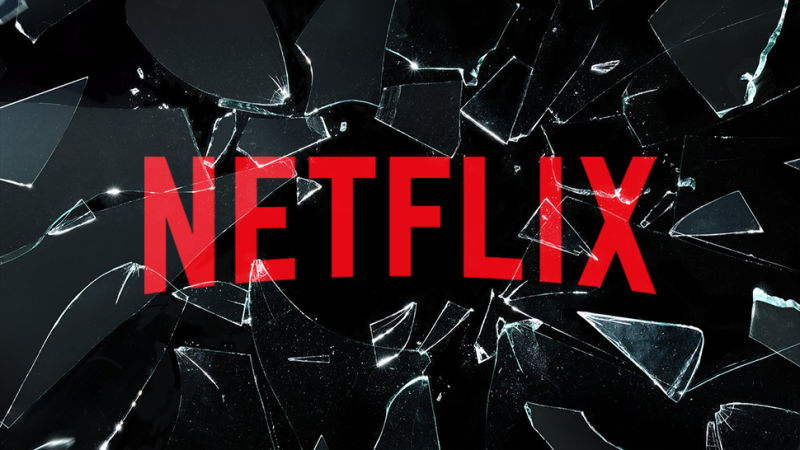

##### **Project Type**    - Unsupervised
##### **Contribution**    -Individual
##### **Name**            - VRUSHALI PHALKE

# **Project Summary -**

**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

**Steps Involved:**


*   **Importing Libraries:** First of all I have imported all libraies requiered for this project.

*   **Loading the dataset:** In this step i have loaded the dataset and discovered  that our dataset contain 7787 rows and 12 columns.

*   **Data Set Information:**Here I have checked the information of dataset and discovered that some of variable of dataset contains null values,duplicate value is not present in dataset and dtype of all variables are object except released year.


*   **Data Wrangling:**In this step,I have changed the date_added column dtype to datetime format and we have extracted year and month from that and made two seperate columns.Also made two seperate dataframe for movies and tvshows and Changed the duration of movies and tvshows dataframe into string.

*   **EDA on features:**In this step i have performed analysis on dataset starting from Univariate than Bivariate and after that Multivariate Analysis.
*   **Hypothesis Testing:**Here we have perfomred some hypothesis testing on our dataset.


*  **Feature Engineering & Data Pre-processing:**In this step i have performed null value treatment and as a part of feature engineering we have done textual data processing which includes:expand contraction, lower casing, removing punctuations and stopwords, normalization,and vectoriztion. We performed data scaling using standardscalar, and dimensionality reduction using PCA.
  
*  **Model Implementation:**In this step we perform clustering using different algorithms, we tried K-Means, ElbowCurve, DBSCAN, Dendogram, Agglomerative Clustering.


*   **Recommendation System:**Lastly we have made content based recommendation sysytem.

# **GitHub Link -**

https://github.com/Asif-PA/NetflixMovies-TVShowsClustering

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
!pip install mapclassify
!pip install geopandas
# Import Libraries
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import math
from scipy.stats import *

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [3]:
# Load Dataset
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/netflix capstone/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

ValueError: mount failed

### Dataset First View

In [ ]:
# Dataset First Look
df.head(5)

In [ ]:

df.tail(5)


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'The number of rows in the dataset is: {df.shape[0]}')
print(f'The number of columns in the dataset is: {df.shape[1]}')

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
# Visualizing the missing values
#plotting missing values in heatmap
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False)


In [ ]:
from pandas.core import missing
# calulating perscentage of null values in the columns
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1,keys=['Total','Percent'])
missing_data


### What did you know about your dataset?

*   **Our dataset contain 7787 rows and 12 columns.**
*   **Datatype of all variables is object except release_year which is int64.**


*   **There is no duplicates in dataset**
*   **Maximum number of null values present in director column followed by cast.**



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe().T

### Variables Description

*   show_id:Unique ID for every Movie / Tv Show

*   type : Identifier - A Movie or TV Show

*   title : Title of the Movie / Tv Show

*   director : Director of the Movie

*   cast : Actors involved in the movie / show
*   country : Country where the movie / show was produced


*   date_added : Date it was added on Netflix


*   release_year : Actual Releaseyear of the movie / show


*   rating : TV Rating of the movie / show


*   duration : Total Duration - in minutes or number of seasons


*   listed_in : Genere
*   description: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.apply(lambda x: x.nunique())


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#Changing date_added to date time format
df["date_added"] = pd.to_datetime(df['date_added'])
#Extracting Year
df['year_added'] = df['date_added'].dt.year
#Extracting Month
df['month_added'] = df['date_added'].dt.month
#Extracting Day
df['day_added'] = df['date_added'].dt.day


In [ ]:
#Seperating TV Show And Movie
netflix_tvshows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

In [ ]:
print(f'shape of netflix_tvshows: {netflix_tvshows.shape}')
print(f'shape of netflix_movies: {netflix_movies.shape}')

In [ ]:
netflix_tvshows['duration']

In [ ]:
#Changing the duration format for movies
# Remove the "min" string from the duration column in the netflix_movies dataframe
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '')

# Convert the duration column from a string data type to an integer data type
netflix_movies['duration'] = netflix_movies['duration'].astype(int)

# Print the updated duration column
print(netflix_movies['duration'])

In [ ]:
#Changing duration of tvshows to interger
# Remove "Season" and "Seasons" strings from the duration column in the netflix_tvshows dataframe
netflix_tvshows['duration'] = netflix_tvshows['duration'].str.replace(' Season', '')
netflix_tvshows['duration'] = netflix_tvshows['duration'].str.replace(' Seasons', '')

# Remove any remaining "s" characters from the duration column
netflix_tvshows['duration'] = netflix_tvshows['duration'].str.replace('s', '')

# Convert the duration column from a string data type to an integer data type
netflix_tvshows['duration'] = netflix_tvshows['duration'].astype(int)

# Print the updated duration column
print(netflix_tvshows['duration'])


### What all manipulations have you done and insights you found?

*   **I have changed the date_added column dtype to datetime format and we have extracted year and month from that and made two seperate columns.**
*   **Made two seperate dataframe for movies and tvshows.**

*   **Changed the duration of movies and tvshows dataframe into string.**


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Define a custom function to create a countplot
# The function accepts 5 required positional arguments and 2 optional arguments
def create_countplot(x, title, xlabel, ylabel, figsize, hue=None, order=None, data=None):

    # Create a new figure with the specified figsize
    plt.figure(figsize=figsize)

    # Create a countplot using the specified x variable, hue variable (if provided), and order (if provided)
    sns.countplot(data=data, x=x, hue=hue, order=order)

    # Set the title, xlabel, and ylabel for the countplot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Rotate the x-axis labels by 45 degrees for better visibility
    plt.xticks(rotation=45)

    # Add tight_layout for better spacing and show the plot
    plt.tight_layout()
    plt.show()


#### Chart - 1 **Visualisaztion of most watch type**

In [ ]:
#Using countplot function for the visualization
create_countplot(data=df,x='type',title='Most Watched On Netflix',xlabel='Type',ylabel='COUNT',figsize=(8, 6))

In [ ]:
# Create a piechart
#Ploting Donut chart for better visualisation
# Create data for the chart
labels = df.type.value_counts().sort_index().index
values = df.type.value_counts().sort_index().values
# Create the donut chart
fig = px.pie(values=values, names=labels,height=500, width=600, hole=.5,title='Mostly watched on Netflix')
fig.update_traces(hovertemplate=None, textposition='outside',
textinfo='percent+label', rotation=90)
# Display the chart
fig.show()


##### 1. Why did you pick the specific chart?

**I have used two plot:**

**1)Countplot- Show the counts of observations in each categorical bin using bars.**

**2)Donut Chart-A donut chart is almost identical to a pie chart, but the center is cut out (hence the name ‘donut’). Donut charts are also used to show proportions of categories that make up the whole, but the center can also be used to display data.**

##### 2. What is/are the insight(s) found from the chart?

**Movies are getting watched mostly than TV shows.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**We can see that TV shows are less than movies so Netflix should release more contents of tv shows also to retain its viewer.**

#### Chart - 2 **Visualisation of Top 10 Directors**

In [ ]:
# Chart - 2 visualization code
#Using countplot function for the visualization
create_countplot(data=df,x='director',title='Top 10 Directors Of Netflix',xlabel='Director',ylabel='COUNT',figsize=(8, 6),order=df.director.value_counts().head(10).index)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Raul Campos, jan suter is most famous director among all.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**If movie/Tvshows will be directed by Top directors than movies/TVshows will earn more revenue due to fanbase of directors.**

#### Chart - 3 **Top 10 Actors**

In [ ]:
# Chart - 3 visualization code
# Create a new DataFrame that only includes rows where the cast column is not empty
actor_df = df[df.cast != ' ']

# Split the values in the cast column by comma and space, and stack the resulting values
actor = actor_df.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Create a new figure with the specified figsize
plt.figure(figsize=(15,8))

# Create a countplot of the actor variable, with the top 10 actors by frequency
sns.countplot(x=actor, order=actor.value_counts().index[:10], palette='rocket')

# Rotate the x-axis labels by 70 degrees for better visibility
plt.xticks(rotation=70)

# Set the xlabel, title, and fontsize for the plot
plt.xlabel("Actors", size=20)
plt.title('Top 10 Actors on Netflix', fontsize=20, fontweight='bold')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

We have used count plot to count the observations in variables and displayed it using bar.



##### 2. What is/are the insight(s) found from the chart?

**We can see the most preferable actor by Netflix is Anupan Kher followed by Shah Rukh khan.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Casting famous actors in movies/Tvshows will help in earning more revenue.**

#### Chart - 4 **Visualisation of Content Released in Month**

In [ ]:
# Chart - 4 visualization code
#Visualising in which month maximum content was released
#using countplot function for the visualization
create_countplot(data=df,x='month_added',title='Month Released',xlabel='Month',ylabel='COUNT',figsize=(8, 6))




##### 2. What is/are the insight(s) found from the chart?

**We can see that most of the content was released in month of October,November,December and January.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Very less contents are released in mid of year so it can be filled by releasing more contents which will increase viewer on Netflix.**

#### Chart -5 **Visualisation of Yearly content Released on Netflix**


In [ ]:
# Chart - 5 visualization code
# Release of movies year-wise
#using countplot function for the visualization
create_countplot(data=df,x='year_added',title='Year Released',xlabel='Year',ylabel='COUNT',figsize=(8, 6))



##### 2. What is/are the insight(s) found from the chart?

**We can see that content released on netflix was continuously increasing till 2019 after it started decreasing and there was sudden downfall in 2021 due to covid.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**We can see that there is increasing trend of released source on netflix till 2020 and there after sudden downfall in 2021 this could be due to the impact of lockdown.**

#### Chart - 6 **Top 10 Genre On Netflix**

In [ ]:
# Chart - 6 visualization code
# Making relevant dataframe for our observation
genre = df[df.listed_in != ' '].set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
create_countplot(x=genre,title='Top Genre',xlabel='Genre',ylabel='COUNT',figsize=(12, 8),order=genre.value_counts().index[:15])




##### 1. Why did you pick the specific chart?

We have used count plot to count the observations in variables and displayed it using bar.

##### 2. What is/are the insight(s) found from the chart?

**Most of the contents on netflix is covered by International Movies and Dramas.**

### Chart - 7 **Rating**

In [ ]:
# Chart - 7 visualization code
# Create a new Matplotlib figure with a size of 10 inches wide by 35 inches tall
plt.figure(figsize=(10,35))
# Create a pie chart of the value counts in the "rating" column of the "df" DataFrame
df.rating.value_counts().plot(kind='pie',autopct='%1.0f%%')
# Add a title to the plot
plt.title('Distribution of Ratings on Netflix', fontsize=15, fontweight='bold')
# Display the plot
plt.show()



##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole.

##### 2. What is/are the insight(s) found from the chart?

**We can see that most of the content released on netflix is TV-MA(Mature Audience)rated followed by TV-14(Not Suitable for age under14).**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Most content on Netflix is TV-MA(Mature Audience) rated,they should add content for other ratings also for rest of the audience.**

#### Chart - 8 **Duration of Movies**

In [ ]:
# Chart - 8 visualization code
# Set the style of Seaborn plots to a white grid with gray grid lines
sns.set_style('whitegrid')
# Create a new Matplotlib figure with a size of 10 inches wide by 7 inches tall
plt.figure(figsize=(10,7))
# Create a KDE plot of the values in the "duration" column of the "netflix_movies" DataFrame
sns.kdeplot(data=netflix_movies['duration'], shade=True)
# Add a title to the plot
plt.title('Distribution of Movie Durations on Netflix')
# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

I have used kde(kernel density estimate)plot, it is used to visualize the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

##### 2. What is/are the insight(s) found from the chart?

**We can see that duration of most of the movies is approx 90 minutes.**

#### Chart - 9 **Duraton Of Tv Shows**

In [ ]:
# Chart - 9 visualization code
# Create a new Matplotlib figure with a size of 10 inches wide by 7 inches tall
plt.figure(figsize=(10,7))
# Create a KDE plot of the values in the "duration" column of the "netflix_tvshows" DataFrame
sns.kdeplot(data=netflix_tvshows['duration'], shade=True)
# Add a title to the plot
plt.title('Distribution of TV Show Durations on Netflix')
# Display the plot
plt.show()


In [ ]:
# Extracting the relevant columns
relevant_df = netflix_tvshows[['type','duration']].copy()

# Calculating the length of the dataset
length = len(relevant_df)

# Grouping by duration and getting the count of each duration
relevant_df = relevant_df.groupby('duration').agg(['count'])
relevant_df = relevant_df.droplevel(0,axis=1)

# Resetting the index to turn the duration column into a regular column
relevant_df.reset_index(inplace=True)

# Calculating the percentage of each duration
relevant_df['%_of_season'] = ((relevant_df['count']/length)*100)

# Setting duration column as the index
relevant_df.set_index('duration', inplace=True)

# Dropping the count column
relevant_df.drop('count', axis=1, inplace=True)

# Specifying labels, colours and executing pie chart
labels = ['0 - 40','41 - 50','51 - 60','61 - 70']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','b','g','r','c','m','y','k']
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1)
relevant_df.plot.pie(figsize = (15,10),fontsize = 18,explode=explode, colors=colors,autopct='%1.1f%%', shadow=True,startangle=120,subplots = True)
# Adding title
plt.title('Percentage Distribution of TV Show Durations', fontsize=15, fontweight='bold')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

I have used kde(kernel density estimate), it is used to visualize the distribution of observations in a dataset, analogous to a histogram.

A pie chart helps organize and show data as a percentage of a whole.

##### 2. What is/are the insight(s) found from the chart?

**Most of the tv shows are 1 season long which is 66.7% of complete Tvshows.**



#### Chart - 10 **Word Analysis in Titles**

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [ ]:
# Chart - 10 visualization code
# Creating the dataframe for word cloud
plt.figure(figsize=(10,7))
df_wc=df['title']
text=" ".join(i for i in df_wc)
# Create stopword list
stopwords=set(STOPWORDS)
# Generate a word cloud image
wordcloud=WordCloud(stopwords=stopwords, background_color='white').generate(text)
# Display the generated image
plt.imshow(wordcloud,interpolation='nearest')
plt.axis('off')
plt.show()


##### 1. Why did you pick the specific chart?

A word cloud (also known as a tag cloud or text cloud) is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

**It seems like Christmas,Love','Man','World','Story','Life' is mostly used words in titles.**

#### Chart - 11 **Country vs Content**

In [ ]:
# Chart - 11 visualization code
#Ploting top 15 Countries vs Content
#Using countplot function for the visualization
create_countplot(data=df,x='country',title='Content Produced Country-wise',xlabel='Country',ylabel='COUNT',figsize=(12, 8),order=df['country'].value_counts().index[0:15],hue='type')




##### 1. Why did you pick the specific chart?

Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space.



##### 2. What is/are the insight(s) found from the chart?

**United States having highest number of content on Netflix compare to other Countries.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**We can see that very less content is available on Netflix for Countries other than United States so Netflix should release more content for such Country also to increase its market value.**

#### Chart - 12 **Type Vs Ratng**

In [ ]:
# Chart - 12 visualization code
#Using countplot function for the visualization
create_countplot(data=df,x='rating',title='Ratng Vs Type ',xlabel='Rating',ylabel='COUNT',figsize=(12, 8),order=df['rating'].value_counts().index[0:15],hue='type')



##### 1. Why did you pick the specific chart?

Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space.



##### 2. What is/are the insight(s) found from the chart?

**We can see that most of the Movie and Tv shows are TV-MA(Mature Audience) rated.**

#### Chart - 13 **Netflix Content Country-Wise**

In [ ]:
# Chart - 13 visualization code
# Select only the rows where the 'country' column is not blank, and then split the string values in the 'country' column on ', ' to create separate columns for each country listed in the title
country = df[df.country != ' '].set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Count the occurrences of each country and create a DataFrame with the results, renaming the columns as 'name' and 'count'
country = pd.DataFrame(country.value_counts().reset_index().rename(columns={'index': 'name', 0: 'count'}))

# Replace country names with their standardized names according to geopandas
country.replace({'name': {
    'West Germany': 'Germany',
    'East Germany': 'Germany',
    'Soviet Union': 'Russia',
    'United States,': 'United States of America',
    'United States': 'United States of America',
    'United Kingdom,': 'United Kingdom',
    'Cambodia,': 'Cambodia',
    'Poland,': 'Poland',
    'Czech Republic': 'Czechia',
    'Vatican City': 'Italy',
    'Hong Kong': 'China',
    'Singapore': 'Malaysia',
    'Liechtenstein': 'Germany',
    'Cayman Islands': 'United Kingdom',
    'Bermuda': 'United Kingdom'
}}, inplace=True)

# View the resulting DataFrame
country


In [ ]:
# getting the world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# merging our data with world map
merge = pd.merge(world,country,how = 'left', left_on = 'name', right_on = 'name')
merge

In [ ]:
# Plotting our data into the world map

# Create a choropleth map using the plot() function from GeoPandas
merge.plot(column="count",  # Specify the column to use for coloring the map
           legend=True,  # Display a legend
           scheme="quantiles",  # Choose the classification scheme for data values
           cmap='cool',  # Specify the colormap to use for coloring the map
           figsize=(20,20),  # Specify the size of the map figure
           missing_kwds={  # Optional styling for missing values
                "color": "lightgrey",  # Specify the color for missing values
                "edgecolor": "red",  # Specify the edge color for missing values
                "hatch": "///",  # Specify the hatch pattern for missing values
                "label": "Missing values"  # Specify the label for missing values in the legend
           })

# Display the map
plt.show()


##### 1. Why did you pick the specific chart?

World map is used to show from which region most of the content was released.

##### 2. What is/are the insight(s) found from the chart?

**We dont have any content from Antartica and most of the regions of Africa**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The above map shows that most of the content is coming from USA,India,China and some part of South America.**

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure (figsize= (10,7))
sns.heatmap(df.corr(),linewidths=.5,annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

**Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables.**

##### 2. What is/are the insight(s) found from the chart?

**We can see that the numeric columns are not much correlated to each other. In our dataset most of the variables was characterbased so heatmap is only showing relationship for numeric columns.These three numeric columns shows date,so there is not much correlation between them.**

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(data=df)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

In [ ]:
# Define helper functions

class findz:

    # Function to calculate z-score for proportions
    def proportion(self, sample, hyp, size):
        return (sample - hyp) / math.sqrt(hyp * (1 - hyp) / size)

    # Function to calculate z-score for means
    def mean(self, hyp, sample, size, std):
        return (sample - hyp) * math.sqrt(size) / std

    # Function to calculate variance
    def variance(self, hyp, sample, size):
        return (size - 1) * sample / hyp


In [ ]:
# calculating variance using lambda function
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)

# creating an instance of the class 'findz'
findz = findz()

# creating a function 'conclusion' to interpret p-value
def conclusion(p):
    # set the significance level
    significance_level = 0.05
    # check if p-value is greater than significance level
    if p > significance_level:
        # if so, fail to reject the null hypothesis
        return f"Failed to reject the Null Hypothesis for p = {p}."
    else:
        # if not, reject the null hypothesis
        return f"Null Hypothesis rejected Successfully for p = {p}"


In [ ]:
# Defining a lambda function to calculate the cumulative distribution function (CDF) of the standard normal distribution
zcdf = lambda x: norm(0,1).cdf(x)

# Defining a function to calculate the p-value for a given z-score and tail type
def p_value(z, tailed):
  # Calculating the CDF of the standard normal distribution for the given z-score
  z = zcdf(z)

  # If the tail type is left-tailed, return the CDF value as is
  if tailed == 'l':
    return z
  # If the tail type is right-tailed, return the complement of the CDF value
  elif tailed == 'r':
    return 1 - z
  # If the tail type is two-tailed, return the p-value based on the direction of the z-score
  elif tailed == 'd':
    if z > 0.5:
      return 2 * (1 - z)
    else:
      return 2 * z
  # If the tail type is not recognized, return NaN
  else:
    return np.nan


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis - Atleast 25 percent of shows(movies & TV shows included) consist of International genre**

**Alternate Hypothesis - Less than 25 percent of shows(movies & TV shows included) consist of International genre**

#### 2. Perform an appropriate statistical test.

In [ ]:
# Making relevant dataframe for our hypothesis test
# Make a copy of the 'genre' DataFrame
relevant_df = genre.copy()

# Sample 1000 rows randomly
relevant_df = relevant_df.sample(1000,random_state=42)

# Reset the index
relevant_df = relevant_df.reset_index()

# Rename the first column to 'type'
relevant_df.rename(columns = {0 : 'type'}, inplace = True)

# Count the number of rows with 'type' = 'International TV Shows'
count = relevant_df[relevant_df['type'] == 'International TV Shows'].count()
 # Add the number of rows with 'type' = 'International Movies'

count = count + relevant_df[relevant_df['type'] == 'International Movies'].count()
count

In [ ]:
# Perform Statistical Test to obtain P-Value
val = 207
p_hyp = 0.25
size = 1000
p_sample = val/size

z = findz.proportion(p_sample,p_hyp,size)
p = p_value(z,'l') #left tailed
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

**We have used Z score to obtain P-value.**

##### Why did you choose the specific statistical test?

**We were dealing with ratios so Z-score is only relevant statistical test for the same.**

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis - Atmost 20 percent of the shows in netflix are rated as TV-MA**

**Alternate Hypothesis - More than 20 percent of the shows in netflix are rated as TV-MA**

#### 2. Perform an appropriate statistical test.

In [ ]:
# copying 'rating' column from the dataframe
relevant_df = df['rating'].copy()

# sampling 1000 rows from the dataframe
relevant_df = relevant_df.sample(1000, random_state=0)

# resetting the index of the sampled dataframe
relevant_df = relevant_df.reset_index()

# dropping the old index column
relevant_df.drop(columns='index', inplace=True)

# counting the number of 'TV-MA' ratings in the sampled dataframe
count = relevant_df[relevant_df['rating'] == 'TV-MA'].count()


In [ ]:
# Perform Statistical Test to obtain P-Value
val = 367
p_hyp = 0.30
size = 1000
p_sample = val/size

z = findz.proportion(p_sample,p_hyp,size)
p = p_value(z,'r') #right tailed
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

**We have used Z score to obtain P-value.**



##### Why did you choose the specific statistical test?

**We were dealing with ratios so Z-score is only relevant statistical test for the same.**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
#Checking Null Values
df.isnull().sum()

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Fill missing values in the 'director' column with 'unknown'.
df['director'].fillna('unknown', inplace=True)

# Fill missing values in the 'cast' column with 'unknown'.
df['cast'].fillna('unknown', inplace=True)

# Fill missing values in the 'country' column with the mode (most common value).
most_common_country = df['country'].mode()[0]
df['country'].fillna(value=most_common_country, inplace=True)

# Remove any rows with missing values in the 'date_added', 'day_added', 'year_added', 'month_added', and 'rating' columns.
df.dropna(subset=['date_added', 'day_added', 'year_added', 'month_added', 'rating'], inplace=True)


In [ ]:
#Cross-Checking Null values after treatment
df.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

*   **I have filled the null value in director and cast columns with 'Unknown',because we dont know which movie was directed and casted by whom .**

*   **Null value of Country column has been filled by mode so that the country having most content on Netflix will come in place of Null value.**

*   **I have dropped null values of date_added, year_added,month_added,day_added and rating columns because they contain very few number of null values.**



### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

**We will be clustering using Director,Cast,Country,Listed in (genres),Description,Rating attributes.**

In [ ]:
#Creating Copy of original dataset too keep original one safe
df1=df.copy()

In [ ]:
# Expand Contraction
#Combaining all important attributes in one column
df1['clustering_attributes'] = (df1['director'] + ' ' +
                                df1['cast'] +' ' +
                                df1['country'] +' ' +
                                df1['listed_in'] +' ' +
                                df1['description']+' '+df1['rating'])

In [ ]:
df1['clustering_attributes'][20]

In [ ]:
df1['clustering_attributes']

#### 2. Lower Casing

In [ ]:
# Lower Casing
df1['clustering_attributes']=df1['clustering_attributes'].str.lower()

In [ ]:
#Cheking the clustering attibutes column after lower casing
df1['clustering_attributes'][20]

**We can see that we have succefully lowered the case of clustering attributes.**

#### 3. Removing Punctuations

In [ ]:
# Remove punctuation from the text :
# Define a function called 'remove_punctuation' that takes a string as input
def remove_punctuation(text):

    # Import the 'string' module, which contains all punctuation characters
    import string

    # Create a translation table that maps each punctuation character to 'None'
    translator = str.maketrans('', '', string.punctuation)

    # Return the input string with all punctuation characters removed using the translation table
    return text.translate(translator)

# Apply the 'remove_punctuation' function to the 'clustering_attributes' column of 'df1'
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)

# Print the value of the 'clustering_attributes' column for the 20th row of 'df1'
print(df1['clustering_attributes'][20])


#### 4. Removing Stopwords & Removing White spaces

In [ ]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

In [ ]:
# Remove Stopwords
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [ ]:
#Checking Stop words removed or not
df1['clustering_attributes']

**We have successfuly removed all stop words.**

#### 6. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# create an object of stemming function :
stemmer = SnowballStemmer("english")

# Define a function called 'stemming' that takes a string as input
def stemming(text):
    # Split the input string into individual words and apply stemming to each word using a stemmer object
    text = [stemmer.stem(word) for word in text.split()]
    # Join the stemmed words back into a single string and return it
    return " ".join(text)

# Apply the 'stemming' function to the 'clustering_attributes' column of 'df1'
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stemming)


In [ ]:
#after stemmng
df1['clustering_attributes'][20]


In [ ]:
#Addng new 2 columns to the df1 whch shows the length of the text of that partcular column
df1['Length(listed_in)'] =df1['listed_in'].apply(lambda x: len(x))
df1['Length(description)'] =df1['description'].apply(lambda x: len(x))
df1.head()

##### Which text normalization technique have you used and why?

**We have used stemming for normalization of text. As Stemming removes last few characters from a word, often leading to incorrect meanings and spelling.**

**Stemming operation bundles together words of same root. e.g. stem operation bundles "response" and "respond" into a common "respon"**

#### 7. Text Vectorization

In [ ]:
# Import the 'TfidfVectorizer' class from the 'sklearn.feature_extraction.text' module
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the 'TfidfVectorizer' class with stop words set to 'english'
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the 'description' column of 'df1' using the 'TfidfVectorizer' instance, creating a TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(df1['description'])

# Print the shape of the TF-IDF matrix
print(tfidf_matrix.shape)




##### Which text vectorization technique have you used and why?

**We have used TF-IDF vectorization method,TF-IDF will transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions.**

**We use TF-IDF because TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.**

### 5. Data Scaling

In [ ]:
# Scaling your data
X_features =df1[['Length(description)','Length(listed_in)']]
stdscaler = preprocessing.StandardScaler()
print(X_features.describe())
X=stdscaler.fit_transform(X_features) #Rescaled X


In [ ]:
df1[['Length(description)','Length(listed_in)']]

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**Importance of Dimesionality Reduction:**


*   **Reduce the complexity of the data**

*   **Improve model performance**

*   **Fewer features require less computation time**

*   **Data will be easy to visualise and interpret**
*   **Noise reduction**

In [ ]:
# DImensionality Reduction (If needed)
pca = PCA(random_state=42)
pca.fit(X)

In [ ]:
#Variance vs number of componets
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# Reducing the dimensions using pca
pca = PCA(n_components=2,random_state=42)
pca.fit(X)
x_pca = pca.transform(X)
x_pca.shape

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

**We have used Principal Component Analysis(PCA),PCA is a technique used to reduce the dimensionality of a dataset while retaining as much information as possible. It is often used to simplify data visualization and to identify patterns or relationships in the data**

## ***7. ML Model Implementation***

### ML Model - 1  ***K-Means***

In [ ]:
# ML Model - 1 Implementation
k_clusters = 4
# Fit the Algorithm
k_means = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=42)
k_means.fit(X)
# Predict on the model
clusters = k_means.predict(X)

In [ ]:
# Evaluate the silhouette score :
score = silhouette_score(X, clusters)
print("Silhouette score is {}".format(score))

In [ ]:
# Adding a seperate column for the clusters Label:
df1["Cluster Label"] = clusters
df1.head()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Create a new DataFrame called 'temp' with columns 'n clusters' and 'silhouette score'
temp = pd.DataFrame(silhouette_score_, columns=["n clusters", "silhouette score"])

# Sort the 'temp' DataFrame by the 'silhouette score' column in descending order
temp = temp.sort_values("silhouette score", ascending=False)

# Display the first 10 rows of the sorted 'temp' DataFrame
temp.head(10)


In [ ]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns :

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]

    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


    # Compute the silhouette scores for each sample :

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them :

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv_r(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle :

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    #ax1.set_facecolor("white")
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.grid(False)

    # The vertical line for average silhouette score of all the values :

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed :

    colors = cm.hsv_r(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters :

    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers :

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')



    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.grid(False)
    #ax2.set_facecolor("white") :

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:**

**Mean intra-cluster distance**: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.

**Mean nearest cluster distance**: Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

The Silhouette Coefficient for a sample is  S=(b−a)max(a,b) .

Range of Silhouette Coefficient is[-1,1].

Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

**Conclusion:** From above we can see that at K=4, the model was giving Silhouette score=0.447, which is best among all numbers of cluster.Further we will try to find optimal number of cluster using Elbow method.

### ML Model - 2 Elbow Method

**The elbow method is a technique used in determining the optimal number of clusters in a data set.The elbow curve uses the sum of squared distance (SSE) to choose an ideal value of k based on the distance between the data points and their assigned clusters.**

In [ ]:
# ML Model - 2 Implementation
sum_of_square_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_square_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters :
# Use 'pointplot' function to create a line plot of the sum of squared distances for each number of clusters
sns.pointplot(x=list(sum_of_square_dist.keys()), y=list(sum_of_square_dist.values()), color="green")

# Add a label for the x-axis
plt.xlabel('Number of Clusters(k)')

# Add a label for the y-axis
plt.ylabel('Sum of Square Distances')

# Add a title for the plot
plt.title('Elbow Method For Optimal k')

# Display the plot
plt.show()



In [ ]:
sum_of_square_dist

**From above graph we can see that elbow is forming at k=5 and curve is getting linear, so we will select k=5 as our optimal number of cluster.**

###**Implementing K-means at k=5**

In [ ]:
# ML Model Implementation
kmeans = KMeans(n_clusters = 5 )
# fit the model
kmeans.fit(X)
# predict on the model
y_kmeans= kmeans.predict(X)

In [ ]:
# Visualizing evaluation Metric Score chart
# Create a new figure with a size of 14 by 10
plt.figure(figsize=(14, 10))

# Set the title of the plot
plt.title('description and listed_in')

# Create a scatter plot using the first two columns of the 'X' array as the x- and y-coordinates, respectively.
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='rainbow')

# Turn off the plot grid
plt.grid(b=None)

# Retrieve the coordinates of the cluster centers from the 'kmeans' object
centers = kmeans.cluster_centers_

# Create a scatter plot to display the cluster centers.
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

# Display the plot
plt.show()


### ML Model - 3 **DBSCAN**

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised machine learning algorithm used for density-based clustering. It groups together points that are closely packed together (points with many nearby neighbors), and marks points that are alone or in low-density regions as noise.**



In [ ]:
# ML Model - 3 Implementation
#Importing Libraries
from sklearn.cluster import DBSCAN
from sklearn import metrics
# Use the DBSCAN algorithm to cluster the data in 'X'
y_pred = DBSCAN(eps=0.9, min_samples=20).fit_predict(X)
plt.figure(figsize=(10, 6))
# Turn off the plot grid
plt.grid(b=None)

# Create a scatter plot using the first two columns of the 'X' array as the x- and y-coordinates, respectively.

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# Display the plot
plt.show()


**We can say that the Voilet color points are in non denser region and they can be consider as noise, because they dont have any pattern and they weren't accepted by any clusters.**

###ML Model - 4 ***Hierarchical clustering.(Dendogram)***

***A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.**

In [ ]:
# Using the dendogram to find the optimal number of clusters
# Import the hierarchical clustering module from the SciPy library
import scipy.cluster.hierarchy as sch

# Create a new figure with a size of 14 by 10 inches
plt.figure(figsize=(14, 10))

# Generate a dendrogram plot using the 'ward' method of linkage clustering
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Draw a horizontal line at y = 70 to mark the threshold for cutting the dendrogram
plt.axhline(y=70, color='r', linestyle='--')

# Set the plot title to 'Dendrogram'
plt.title('Dendrogram')

# Label the x-axis 'Customers'
plt.xlabel('Customers')

# Label the y-axis 'Euclidean Distances'
plt.ylabel('Euclidean Distances')

# Display the plot
plt.show()



**Dendogram is showing k=3 as optimal number of clusters.**

###Model-5 **Agglomerative Hierarchical Clustering**

**The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets.**

In [ ]:
# Model 5 implementation
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
# predict on the model
y_hc = hc.fit_predict(X)

In [ ]:
# Visualizing the clusters :
# Create a new figure with a size of 14  by 10
plt.figure(figsize=(14, 10))

# Plot data points for each cluster, coloring them differently and assigning labels to each cluster
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='yellow', label='4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='black', label='5')

# Add a title to the plot
plt.title('Clusters of content')

# Add a legend to the plot indicating which label corresponds to each cluster
plt.legend()

# Display the plot
plt.show()


## **Recommendation System**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#TF-IDF is a technique used to measure the importance of words in a document based on their frequency and rarity across a collection of documents.
# Create the TF-IDF vectorizer object
vectorizer = TfidfVectorizer()
# Fit and transform  into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(df1['description'])
# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()
# Create a DataFrame to display the TF-IDF scores of the first document
df = pd.DataFrame(tfidf_matrix[0].T.todense(), index=feature_names, columns=["tf-idf score"])
# Print the DataFrame
print(df)

In [ ]:
#CountVectorizer:step counts the frequency of each word in the text

#TfidfTransformer:TfidfTransformer step scales the importance of each word based on how frequently it appears in the document and how frequently it appears in the entire corpus.

# Import the Pipeline class from the sklearn.pipeline module
from sklearn.pipeline import Pipeline

# Create a pipeline with two steps: CountVectorizer and TfidfTransformer. The stop_words parameter is set to 'english'
pipe = Pipeline([('cv', CountVectorizer(stop_words='english')),
                ('tfid', TfidfTransformer())]).fit(df1['description'])

# Use the 'cv' step of the pipeline to transform the 'description' column of the 'df1' dataframe into a matrix of term frequencies
cv_matrix = pipe['cv'].transform(df1['description']).toarray()
print("CountVectorizer_matrix: {}".format(cv_matrix))

# Use the 'tfid' step of the pipeline to compute the inverse document frequencies for each term
tfidf_matrix = pipe['tfid'].idf_
print("TfidfTransformer_matrix: {}".format(tfidf_matrix))

In [ ]:
#The lower the IDF value of a word, the less unique it is to any particular document
pd.DataFrame(pipe['tfid'].idf_, index=pipe['cv'].get_feature_names_out(), columns=['idf_weights'])


###**Cosine Similarity**

**Cosine similarity is a measure used to determine the similarity between two items based on their feature vectors. It can be used to recommend items to users that are similar to items they have previously liked or interacted with.**

**It measures the cosine of the angle between two vectors projected in a multi-dimensional space to find out how similar the documents are irrespective of their size**

In [ ]:
# Import the necessary library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TfidfVectorizer object to transform the text data into a numerical representation
vectorizer = TfidfVectorizer()

# Fit and transform the text data using the vectorizer
tfidf_matrix = vectorizer.fit_transform(df1['title'])

# Compute the cosine similarity matrix between the tfidf matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Get the list of program titles
program_list = df1['title'].tolist()


In [ ]:
# Define a function to recommend programs based on a given program title
def recommend(title, cosine_similarity=cosine_sim):
    # Get the index of the program title in the program list
    index = program_list.index(title)

    # Compute the cosine similarity scores between the program and all other programs
    sim_scores = list(enumerate(cosine_similarity[index]))

    # Sort the similarity scores in descending order and exclude the first one (which is the program itself)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the indices of the top 10 most similar programs
    recommend_indices = [i[0] for i in sim_scores]

    # Get the titles and similarity scores of the top 10 most similar programs
    recommend_programs = df1['title'].iloc[recommend_indices]
    recommend_scores = [round(i[1], 4) for i in sim_scores]

    # Create a pandas dataframe to display the recommended programs and their similarity scores
    rec_table = pd.DataFrame(list(zip(recommend_programs, recommend_scores)), columns=['Recommend Programme', 'Similarity Score'])

    # Return the dataframe
    return rec_table


In [ ]:
#Checking Recommendation  system working correctly or not.
recommend('Avengers: Infinity War')

**We can see that algorithm is accuratly recommending movies which is similar to Avengers: Infinity War.**

In [ ]:
recommend('Delhi Crime')

**We can see that algorithm is giving all the recommendation similar to Delhi crime.**

In [ ]:
recommend('A Love Story')

**We can see that algorithm is giving all the recommendation similar to A Love Story.**

# **Conclusion**


**> Our dataset contain 7787 rows and 12 columns.There was'nt any duplicates in dataset,
and maximum number of null value was present in director column followed by cast.**

**> Most of the content on Netflix is from Movies(~69%) and only 31% tv shows.**

**> Raul Campos, jan suter was most famous director among all**

**> Anupam Kher is most popular actor on Netflix.**

**> Most of the content released on Netflix by the end of current year and starting of new year.**

**> International Movies and Dramas are topmost Genres on Netflix.**

**> Most of the content on Netflix is TV-MA(Mature Audience) rated.**

**> United states has the highest number of content on the netflix ,followed by India.**

**> Most of the movies have duration of 90mimutes.**

**> In title column we got 'Love','Man','World','Story','Life' seems very common word.**



**> We have implemented 5 clustering model to divide the dataset in clusters.**

**> K-means clustering shows that '4' will be optimum no of clusters with the silhoutte score of 0.45. But we selected Optimum cluster number as 5 after Elbow curve cross validation.Thus K-means clustering will be best for this data set.**


**>We have built cosine based  recommender system  using cosine_similarity, which was wroking nicely.**


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***